In [47]:
import sqlite3

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Lecture des zones parents :

db_filename = '../data/arbres.db'
db = sqlite3.connect(db_filename)

cursor = db.cursor()

In [30]:
cursor.execute(""" SELECT DISTINCT code_parent, code_parent_desc FROM arbres  """)
zones_parent = { x[0]: {'name':x[1]} for x in cursor.fetchall()}

print( len(zones_parent) )

1445


In [31]:
list(zones_parent.keys())[0]

'ESP813'

In [70]:
for code_parent, infos in zones_parent.items():
    cursor.execute("""
        SELECT genre_bota, longitude, latitude FROM arbres 
        WHERE code_parent  = ?""", (code_parent, ))

    #nametuples = cursor.fetchmany(10)
    infos['arbres'] = cursor.fetchall()

In [77]:

def get_coords_list( arbres ):
    XY = [ (tree[1], tree[2])  for tree in arbres ]
    return XY

def coords_unzipped( coords ):
    X, Y = [ uv for uv in zip( *coords )]
    return X, Y

def get_species( arbres ):
    spec = { tree[0] for tree in arbres }
    return spec

def convert_to_meter( *XY ):
    R =  6371008  # m , volumétrique ?
    uv = [ np.array(u)*np.pi/180*R for u in XY ]
    uv = [ u - np.min(u) for u in uv ]
    return uv

In [90]:
infos = list( zones_parent.values() )[1379]
print( infos['name'], len(infos['arbres']), get_species(infos['arbres'])  )

Av Washington Pltte av J-O 56 {'Populus', None, 'Tilia'}


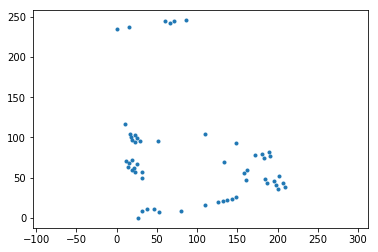

In [91]:
L = get_coords_list( infos['arbres'] )
X, Y = coords_unzipped( L )

u, v = convert_to_meter( X, Y )
plt.plot( u, v,'.' )
plt.axis('equal');